# Importing necessary libraries

In [2]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


2024-09-22 18:35:33.313001: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 18:35:33.326318: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 18:35:33.330160: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-22 18:35:33.339383: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-22 18:35:34.045679: W tensorflow/compiler/tf2

# Importing Training data, and Testing data

In [3]:
data = pd.read_csv("Training.csv")
data = data.drop(columns=['Unnamed: 133'])

labels = data['prognosis']
train = data.drop(columns=['prognosis'])
train.columns = train.columns.str.replace(' ', '')
train.sample(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
562,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1194,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4387,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3407,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2394,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4552,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1787,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2897,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Importing symptom severity : 

In [4]:
severity = pd.read_csv("Symptom-severity.csv")
severity = dict(zip(list(severity['Symptom']), list(severity['weight'])))
severity.pop('prognosis')
(severity)

{'itching': 1,
 'skin_rash': 3,
 'nodal_skin_eruptions': 4,
 'continuous_sneezing': 4,
 'shivering': 5,
 'chills': 3,
 'joint_pain': 3,
 'stomach_pain': 5,
 'acidity': 3,
 'ulcers_on_tongue': 4,
 'muscle_wasting': 3,
 'vomiting': 5,
 'burning_micturition': 6,
 'spotting_urination': 6,
 'fatigue': 4,
 'weight_gain': 3,
 'anxiety': 4,
 'cold_hands_and_feets': 5,
 'mood_swings': 3,
 'weight_loss': 3,
 'restlessness': 5,
 'lethargy': 2,
 'patches_in_throat': 6,
 'irregular_sugar_level': 5,
 'cough': 4,
 'high_fever': 7,
 'sunken_eyes': 3,
 'breathlessness': 4,
 'sweating': 3,
 'dehydration': 4,
 'indigestion': 5,
 'headache': 3,
 'yellowish_skin': 3,
 'dark_urine': 4,
 'nausea': 5,
 'loss_of_appetite': 4,
 'pain_behind_the_eyes': 4,
 'back_pain': 3,
 'constipation': 4,
 'abdominal_pain': 4,
 'diarrhoea': 6,
 'mild_fever': 5,
 'yellow_urine': 4,
 'yellowing_of_eyes': 4,
 'acute_liver_failure': 6,
 'fluid_overload': 4,
 'swelling_of_stomach': 7,
 'swelled_lymph_nodes': 6,
 'malaise': 6,
 'bl

## Finishing the dataset by multiplying the symptoms by their severity

In [5]:
for i,j in severity.items():
    train[i] *= severity[i]
train.sample(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4260,0,3,0,0,0,0,0,0,0,0,...,2,2,2,0,0,0,0,0,0,0
3465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2846,0,3,0,0,0,3,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,0,0,0,4,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3336,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4361,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
label_encoder = LabelEncoder()

X = train
Y = label_encoder.fit_transform(labels)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)
    
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

# Optional: check the sizes of the splits
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))


Training set size: 4428
Test set size: 492


# Analyzing the data
## Frequency Plot of Symptoms

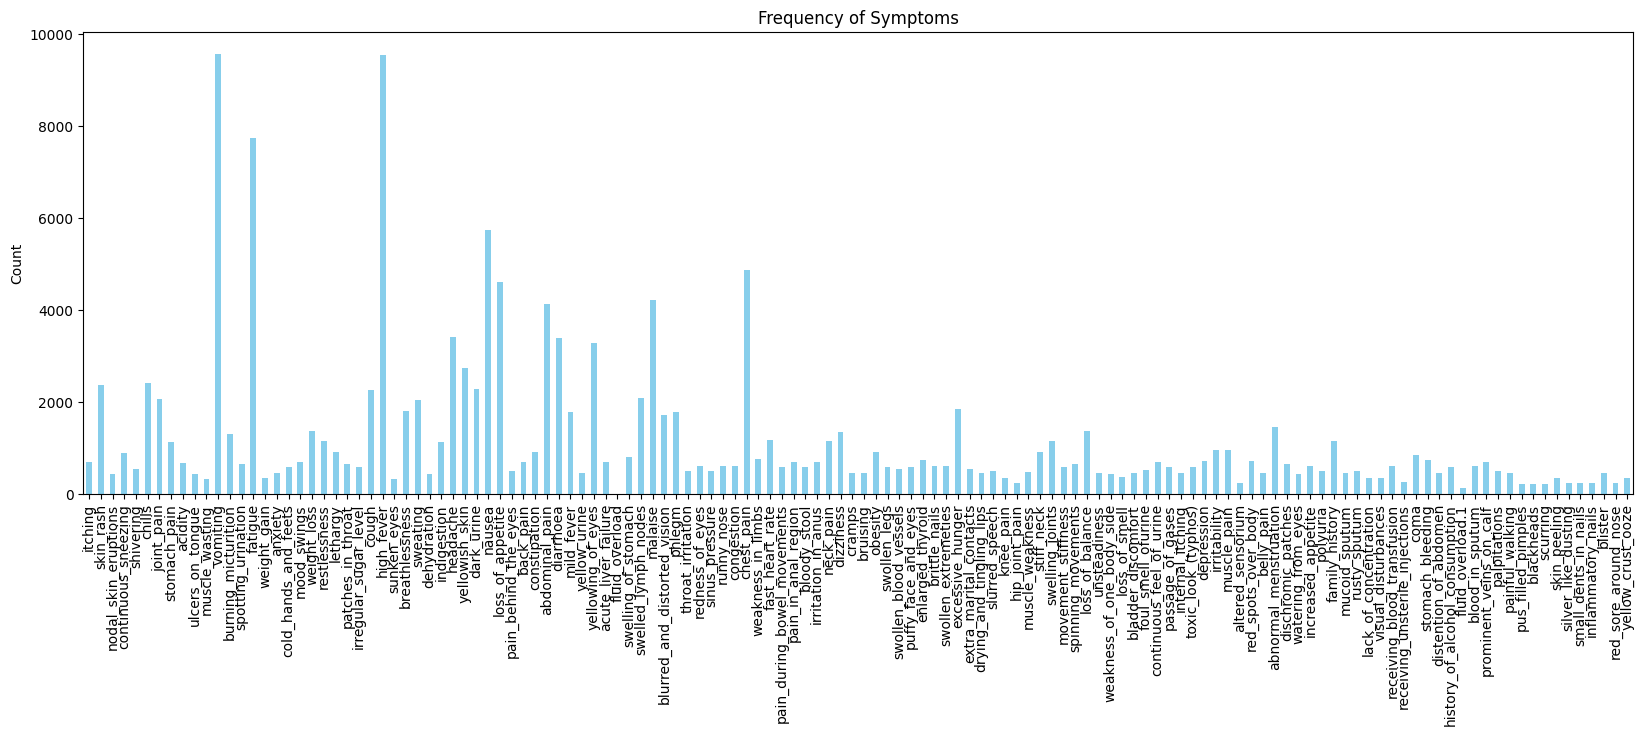

In [8]:
symptom_columns = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering']  # Add more symptoms as needed

# Count occurrences of each symptom
symptom_sums = train[list(train.columns)].sum()

# Plot the results
symptom_sums.plot(kind='bar', figsize=(20, 6), color='skyblue')
plt.title('Frequency of Symptoms')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## Correlation Heatmap

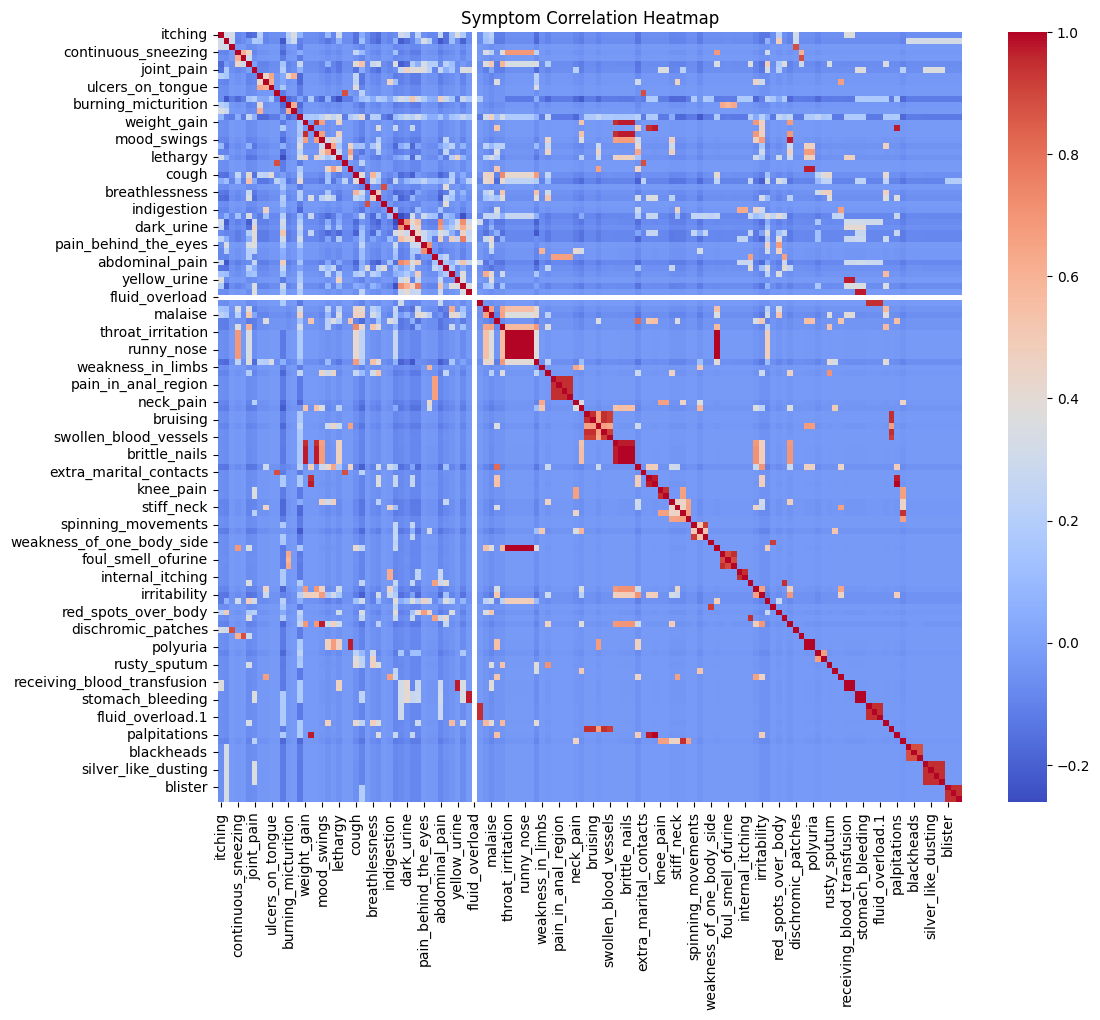

In [9]:
plt.figure(figsize=(12, 10))
correlation_matrix = train.corr()

# Creating a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Symptom Correlation Heatmap')
plt.show()


# Initializing the Model

In [10]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer (one for each class)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if your labels are one-hot encoded
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


/home/aymen/miniconda3/envs/Ai-ML/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1727026536.587566   25654 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727026536.614413   25654 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727026536.614604   25654 cuda_exe

Epoch 1/50


I0000 00:00:1727026537.845014   25979 service.cc:146] XLA service 0x75cea000a2c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727026537.845030   25979 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-09-22 18:35:37.860388: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-22 18:35:37.938234: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 80/111 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.3389 - loss: 3.1057

I0000 00:00:1727026538.736142   25979 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4254 - loss: 2.8367 - val_accuracy: 0.9718 - val_loss: 0.3655
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9942 - loss: 0.2000 - val_accuracy: 1.0000 - val_loss: 0.0416
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0334 - val_accuracy: 1.0000 - val_loss: 0.0154
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - v

# Accuracy and Loss

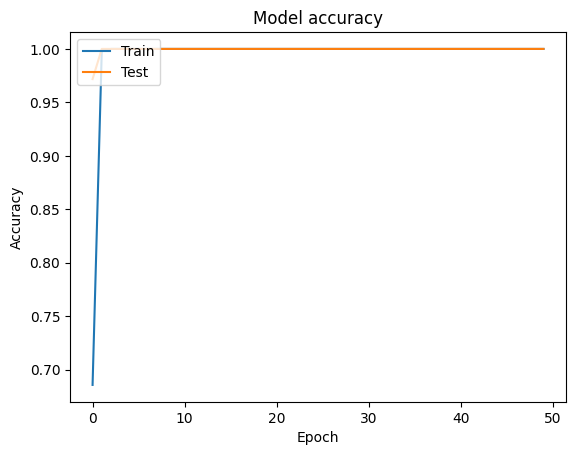

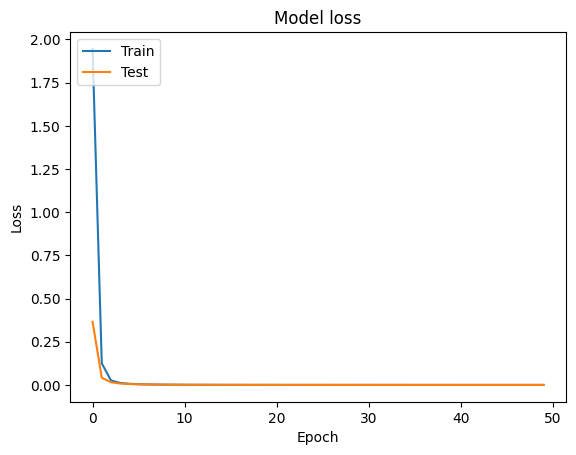

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [12]:
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Print classification report
print(classification_report(y_test, y_pred_classes))



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00         5
          16       1.00     

# Testing

In [13]:
with open('label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)
    
test_data = pd.read_csv("Testing.csv")
test_data.columns = test_data.columns.str.replace(" ","")

test_labels = test_data['prognosis']
test_labels_encoded = label_encoder.transform(test_labels)
test_data = test_data.drop(columns=['prognosis'])

y_pred = model.predict(test_data)

y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# Evaluate accuracy
accuracy = accuracy_score(test_labels_encoded, y_pred_classes)
print(f'Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Accuracy: 0.9761904761904762


# Confusion Matrix

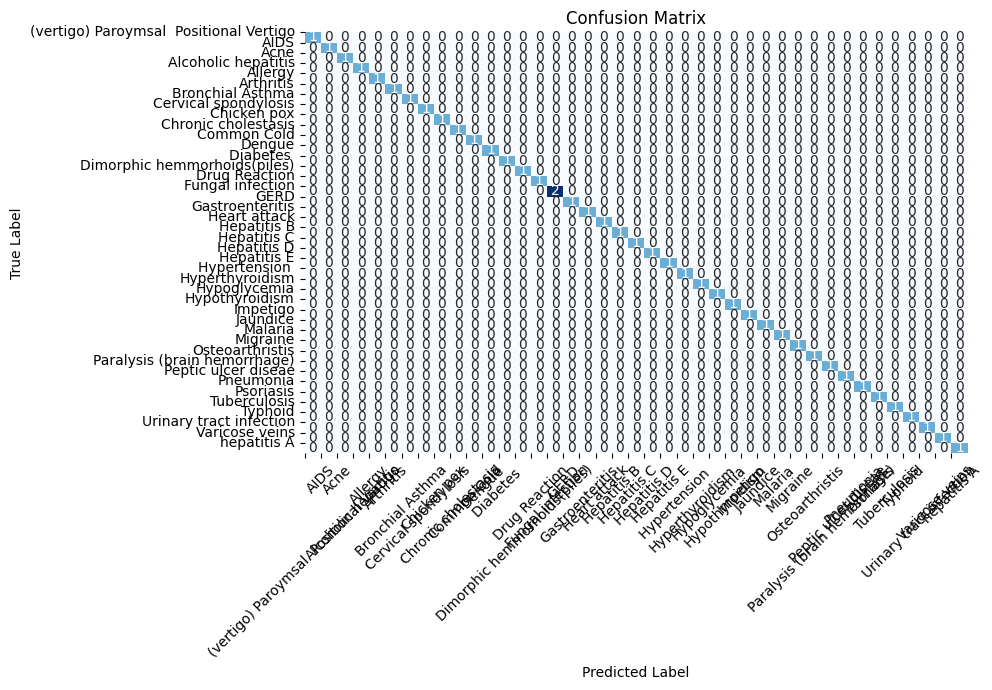

In [14]:

# Calculate confusion matrix using encoded labels
cm = confusion_matrix(test_labels_encoded, y_pred_classes)

# Set up the figure and axis for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Set tick marks for the labels
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.yticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

# Saving the model

In [15]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)